# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats


In [88]:
df = pd.read_csv('C:/Users/sandhya/Desktop/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of body temperatures normal? 

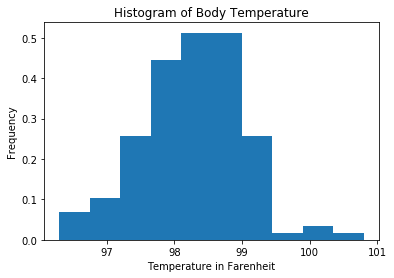

In [89]:

plt.hist(df.temperature, normed=True)
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Frequency')
plt.title('Histogram of Body Temperature')




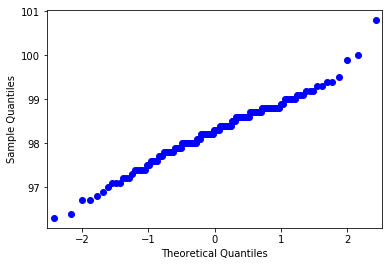

In [90]:
fig =sm.qqplot(df.temperature,dist="norm")
plt.show()

Temperature distribution is approximately normal.

In [91]:
#testing for normality of data
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

p-value is greater than 0.05, which implies data is normally distributed.

### Is the sample size large? Are the observations independent? 

In [92]:
df.shape

(130, 3)

In [93]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


There are 130 observations. according to central limit theorm sample size > 30 is large enough to do any testing. Samples are independent of each other as they have no effect on one another.

### Is the true population mean really 98.6 degrees F? 
### Would you use a one-sample or two-sample test? Why? 

One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F. Z-statistic is appropriate to use in this case since sample size>30. If calculated p_value is < assumed p_value of 0.05, then H0 will be rejected.

Let's first formulate the null hypothesis  and the alternate hypotheses .
##### H0 (null hypothesis): Body Temperature is 98.6
##### H1(alternate hypothesis) : Body Temperature is not 98.6

In [94]:
z_score= np.sqrt(130)*(df.temperature.mean() - 98.6)/df.temperature.std()
print z_score

-5.45482329236


In [95]:
p_value= (1-stats.norm.sf(z_score))
print p_value

2.45107850683e-08


pvalue is less very small, indicating that we can reject the null hypothesis. This means that the average temperature is not 98.6.


### In this situation, is it appropriate to use the ttest or z test ztatistic? 

It is appropriate to use the z test because we have sample size>30 and we know the population mean.

In [96]:
from statsmodels.stats.weightstats import ztest
print ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)


### Now try using the other test. How is the result be different? Why?

In [97]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### At what temperature should we consider someone's temperature to be "abnormal"?

We calculate a confidence interval on the true population average temperature. If someone's temperature is out of this interval, we could say that the temprerature is abnormal.

In [98]:
sample_sd=df['temperature'].std()
sample_mean=df['temperature'].mean()
margin_error =  sample_sd / np.sqrt(len(df['temperature']))
margin = 1.96*margin_error #95% confidence
confidence_interval = [sample_mean-margin,sample_mean+margin]
confidence_interval

[98.123194112228518, 98.375267426233037]

In [99]:
print len(df[(df.temperature < 98.123) | (df.temperature > 98.375)])

115


We observe that 115 out of total 130 are out of this range. 
So, we can say that, if someone's temperature is above 98.375 or below 98.123, then their temperature is considered abnormal.

### Is there a significant difference between males and females in normal temperature? 
### What test did you use and why? 
### Write a story with your conclusion in the context of the original problem. 

In [100]:
female = np.array(df.temperature[df.gender=='F'])
male = np.array(df.temperature[df.gender=='M'])


The observations from the first sample must not have any bearing on the observations from the second sample.Here body temperature of male and female population is independent. so e can use 2 sample test.
##### H0(null hypothesis) : There is no significant difference between males and females in normal temperature
##### H1 (alternate hypothesis): There is  significant difference between males and females in normal temperature

In [101]:
# code to calculate mean,std deviation, sample size and t-score
x1=female.mean() 
x2=male.mean()
s1=female.std()
s2=male.std()
n1=len(female)
n2=len(male)
t_score=((x1-x2)-0)/np.sqrt((s1*s1)/n1+(s2*s2)/n2)
print t_score

2.30322028919


In [102]:
# degree of freedom and p-value calculation.
df=n1+n2-2
p = 1 - stats.t.cdf(t_score,df=df)
print pvalue*2  #two tail

0.0212664518301


In [103]:
stats.ttest_ind(female,male)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

We see that the pvalue is smaller than 0.05.. Hence, we reject the null hypothesis. we conclude that there is significant difference between males and females in normal temperature and the average temperature is not 98.6.